<a href="https://colab.research.google.com/github/SreeLekha-27/DA-Python-Module-End-Assignment/blob/main/Copy_of_Social_Media_Engagement_Analytics_Using_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Import & Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df=pd.read_csv("https://raw.githubusercontent.com/SreeLekha-27/Datasets/refs/heads/main/social_media_engagement_5000.csv")
df.head(1)

user_id   age  gender country  post_id post_type post_category   likes  \
0    25795  43.0  Female  Brazil   496713     image       fitness  7011.0   

   comments  shares  watch_time_sec  impression_count   posted_at  \
0     354.0  1157.0            5726             44650  17-12-2022   

   follower_count  is_verified device_type sentiment               hashtags  \
0           81734        False      mobile  negative  #foodie #travel #love   

   engagement_rate  
0         0.190862

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5000 non-null   int64  
 1   age               4850 non-null   float64
 2   gender            4850 non-null   object 
 3   country           5000 non-null   object 
 4   post_id           5000 non-null   int64  
 5   post_type         5000 non-null   object 
 6   post_category     5000 non-null   object 
 7   likes             4850 non-null   float64
 8   comments          4850 non-null   float64
 9   shares            4850 non-null   float64
 10  watch_time_sec    5000 non-null   int64  
 11  impression_count  5000 non-null   int64  
 12  posted_at         5000 non-null   object 
 13  follower_count    5000 non-null   int64  
 14  is_verified       5000 non-null   bool   
 15  device_type       5000 non-null   object 
 16  sentiment         4850 non-null   object 


In [ ]:
df['posted_at']=pd.to_datetime(df['posted_at'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5000 non-null   int64         
 1   age               4850 non-null   float64       
 2   gender            4850 non-null   object        
 3   country           5000 non-null   object        
 4   post_id           5000 non-null   int64         
 5   post_type         5000 non-null   object        
 6   post_category     5000 non-null   object        
 7   likes             4850 non-null   float64       
 8   comments          4850 non-null   float64       
 9   shares            4850 non-null   float64       
 10  watch_time_sec    5000 non-null   int64         
 11  impression_count  5000 non-null   int64         
 12  posted_at         5000 non-null   datetime64[ns]
 13  follower_count    5000 non-null   int64         
 14  is_verified       5000 n

In [ ]:
# Data Cleaning
df.isnull().sum()

user_id               0
age                 150
gender              150
country               0
post_id               0
post_type             0
post_category         0
likes               150
comments            150
shares              150
watch_time_sec        0
impression_count      0
posted_at             0
follower_count        0
is_verified           0
device_type           0
sentiment           150
hashtags              0
engagement_rate       0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cleaning Missing Data
df["age"].fillna(df["age"].median(),inplace=True)

In [ ]:
df["likes"].fillna(df["likes"].median(),inplace=True)

In [ ]:
df["comments"].fillna(df["comments"].median(),inplace=True)

In [ ]:
df["shares"].fillna(df["shares"].median(),inplace=True)

In [ ]:
df["gender"].fillna(df["gender"].mode()[0],inplace=True)

In [ ]:
df["sentiment"].fillna(df["sentiment"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

user_id             0
age                 0
gender              0
country             0
post_id             0
post_type           0
post_category       0
likes               0
comments            0
shares              0
watch_time_sec      0
impression_count    0
posted_at           0
follower_count      0
is_verified         0
device_type         0
sentiment           0
hashtags            0
engagement_rate     0
dtype: int64

In [ ]:
# Duplicate Handling
df.duplicated().sum()

np.int64(0)

In [ ]:
# Data Formatting
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df['country'].unique()

array(['Brazil', 'UK', 'France', 'Canada', 'Japan', 'Australia', 'India',
       'UAE', 'Germany', 'USA'], dtype=object)

In [ ]:
df['post_type'].unique()

array(['image', 'reel', 'text', 'video'], dtype=object)

In [ ]:
df['post_category'].unique()

array(['fitness', 'food', 'tech', 'travel', 'fashion', 'lifestyle',
       'education', 'music'], dtype=object)

In [ ]:
df['device_type'].unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [ ]:
df['sentiment'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [ ]:
cols = ['post_type', 'post_category', 'device_type', 'sentiment']

df[cols] = df[cols].apply(lambda x: x.str.capitalize())

In [ ]:
df.head()

user_id   age  gender country  post_id post_type post_category    likes  \
0    25795  43.0  Female  Brazil   496713     Image       Fitness   7011.0   
1    10860  33.0    Male  Brazil   157326      Reel          Food  11750.0   
2    86820  32.0  Female      UK   109864      Text          Food   4862.0   
3    64886  51.0   Other  France   848877      Text       Fitness   5350.0   
4    16265  34.0   Other      UK   449706     Image       Fitness  12682.0   

   comments  shares  watch_time_sec  impression_count  posted_at  \
0     354.0  1157.0            5726             44650 2022-12-17   
1    2606.0  1807.0            5947             80216 2023-06-02   
2     344.0   955.0            6946             44858 2023-05-07   
3    1083.0  1049.0             229             70455 2023-02-12   
4    2735.0  1300.0            4798              6019 2023-05-23   

   follower_count  is_verified device_type sentiment               hashtags  \
0           81734        False      Mobile  Negative  #foodie #travel #love   
1            5963        False      Mobile  Negative               #fitness   
2          501783        False      Tablet  Positive                #foodie   
3          480212        False      Mobile  Negative    #music #foodie #fun   
4          383936        False      Mobile  Negative                #travel   

   engagement_rate  
0         0.190862  
1         0.201493  
2         0.137345  
3         0.106195  
4         2.777372

In [ ]:
# Feature Cleaning
df['hashtags']

0             #foodie #travel #love
1                          #fitness
2                           #foodie
3               #music #foodie #fun
4                           #travel
                   ...             
4995                   #travel #fun
4996                 #foodie #reels
4997               #lifestyle #tech
4998          #reels #love #fitness
4999    #foodie #lifestyle #fashion
Name: hashtags, Length: 5000, dtype: object

In [ ]:
df['hashtag_count'] = df['hashtags'].apply(
    lambda x: len(x.split())
)

In [ ]:
df[['hashtags','hashtag_count']]

hashtags  hashtag_count
0           #foodie #travel #love              3
1                        #fitness              1
2                         #foodie              1
3             #music #foodie #fun              3
4                         #travel              1
...                           ...            ...
4995                 #travel #fun              2
4996               #foodie #reels              2
4997             #lifestyle #tech              2
4998        #reels #love #fitness              3
4999  #foodie #lifestyle #fashion              3

[5000 rows x 2 columns]

In [ ]:
# Data Exploration using Pandas
df.head()

user_id   age  gender country  post_id post_type post_category    likes  \
0    25795  43.0  Female  Brazil   496713     Image       Fitness   7011.0   
1    10860  33.0    Male  Brazil   157326      Reel          Food  11750.0   
2    86820  32.0  Female      UK   109864      Text          Food   4862.0   
3    64886  51.0   Other  France   848877      Text       Fitness   5350.0   
4    16265  34.0   Other      UK   449706     Image       Fitness  12682.0   

   comments  shares  watch_time_sec  impression_count  posted_at  \
0     354.0  1157.0            5726             44650 2022-12-17   
1    2606.0  1807.0            5947             80216 2023-06-02   
2     344.0   955.0            6946             44858 2023-05-07   
3    1083.0  1049.0             229             70455 2023-02-12   
4    2735.0  1300.0            4798              6019 2023-05-23   

   follower_count  is_verified device_type sentiment               hashtags  \
0           81734        False      Mobile  Negative  #foodie #travel #love   
1            5963        False      Mobile  Negative               #fitness   
2          501783        False      Tablet  Positive                #foodie   
3          480212        False      Mobile  Negative    #music #foodie #fun   
4          383936        False      Mobile  Negative                #travel   

   engagement_rate  hashtag_count  
0         0.190862              3  
1         0.201493              1  
2         0.137345              1  
3         0.106195              3  
4         2.777372              1

In [ ]:
df.tail()

user_id   age  gender    country  post_id post_type post_category  \
4995    59500  44.0    Male  Australia   441541     Video     Education   
4996    22100  38.0   Other        UAE   677076      Reel     Education   
4997    67021  63.0  Female        USA   273595      Text        Travel   
4998    29800  13.0  Female    Germany   785644     Video       Fitness   
4999    73400  54.0   Other      Japan   712252      Text        Travel   

        likes  comments  shares  watch_time_sec  impression_count  posted_at  \
4995  16210.0    2013.0  1837.0            6190             42977 2022-06-25   
4996  16924.0    2734.0  1583.0            7764             34196 2022-11-18   
4997  13487.0    1497.0   167.0            7466             23680 2023-04-06   
4998  16894.0    1289.0  1713.0            4991             89013 2022-05-16   
4999  14830.0     503.0  1798.0            3743             14234 2023-03-04   

      follower_count  is_verified device_type sentiment  \
4995          646147        False      Mobile  Positive   
4996          584603        False     Desktop  Negative   
4997          483550        False     Desktop  Positive   
4998          183295        False      Tablet  Positive   
4999          585760        False     Desktop   Neutral   

                         hashtags  engagement_rate  hashtag_count  
4995                 #travel #fun         0.466761              2  
4996               #foodie #reels         0.621155              2  
4997             #lifestyle #tech         0.679688              2  
4998        #reels #love #fitness         0.223518              3  
4999  #foodie #lifestyle #fashion         1.203527              3

In [ ]:
df.shape

(5000, 20)

In [ ]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'post_id', 'post_type',
       'post_category', 'likes', 'comments', 'shares', 'watch_time_sec',
       'impression_count', 'posted_at', 'follower_count', 'is_verified',
       'device_type', 'sentiment', 'hashtags', 'engagement_rate',
       'hashtag_count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5000 non-null   int64         
 1   age               5000 non-null   float64       
 2   gender            5000 non-null   object        
 3   country           5000 non-null   object        
 4   post_id           5000 non-null   int64         
 5   post_type         5000 non-null   object        
 6   post_category     5000 non-null   object        
 7   likes             5000 non-null   float64       
 8   comments          5000 non-null   float64       
 9   shares            5000 non-null   float64       
 10  watch_time_sec    5000 non-null   int64         
 11  impression_count  5000 non-null   int64         
 12  posted_at         5000 non-null   datetime64[ns]
 13  follower_count    5000 non-null   int64         
 14  is_verified       5000 n

In [ ]:
df.dtypes

user_id                      int64
age                        float64
gender                      object
country                     object
post_id                      int64
post_type                   object
post_category               object
likes                      float64
comments                   float64
shares                     float64
watch_time_sec               int64
impression_count             int64
posted_at           datetime64[ns]
follower_count               int64
is_verified                   bool
device_type                 object
sentiment                   object
hashtags                    object
engagement_rate            float64
hashtag_count                int64
dtype: object

In [ ]:
df.describe()

user_id          age        post_id         likes     comments  \
count   5000.000000  5000.000000    5000.000000   5000.000000  5000.000000   
mean   54561.890800    38.440400  548042.909000  10106.997400  1502.039800   
min    10055.000000    13.000000  100068.000000     10.000000     0.000000   
25%    32309.500000    26.000000  322543.500000   5235.000000   792.000000   
50%    54374.500000    38.000000  548077.500000  10105.500000  1497.000000   
75%    77180.500000    51.000000  771574.500000  14959.000000  2235.250000   
max    99963.000000    64.000000  999455.000000  19998.000000  2999.000000   
std    26090.370121    14.687151  260646.957267   5702.293017   856.393312   

          shares  watch_time_sec  impression_count  \
count  5000.0000     5000.000000       5000.000000   
mean   1002.9106     4014.503200      50013.732800   
min       0.0000        0.000000        105.000000   
25%     511.0000     2017.750000      24988.250000   
50%    1012.0000     4034.500000      49934.500000   
75%    1483.0000     6020.250000      74662.250000   
max    1999.0000     7998.000000      99995.000000   
std     570.8552     2308.096459      28844.939104   

                        posted_at  follower_count  engagement_rate  \
count                        5000     5000.000000      5000.000000   
mean   2022-12-28 13:21:30.240000   393698.224800         0.964356   
min           2022-01-01 00:00:00       87.000000         0.006363   
25%           2022-07-03 18:00:00   194480.000000         0.145781   
50%           2022-12-27 00:00:00   388982.000000         0.253896   
75%           2023-06-28 00:00:00   589744.250000         0.504794   
max           2023-12-31 00:00:00   799533.000000       191.504348   
std                           NaN   230927.884535         5.318029   

       hashtag_count  
count    5000.000000  
mean        1.998600  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         3.000000  
max         3.000000  
std         0.812853

In [ ]:
df['gender'].value_counts()

gender
Male      1849
Other     1581
Female    1570
Name: count, dtype: int64

In [ ]:
df['post_type'].unique()

array(['Image', 'Reel', 'Text', 'Video'], dtype=object)

In [ ]:
df['post_category'].nunique()

8

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

user_id       age   post_id     likes  comments    shares  \
user_id           1.000000 -0.006688  0.020051  0.025811 -0.033395  0.013763   
age              -0.006688  1.000000 -0.013153 -0.036322 -0.007284  0.013871   
post_id           0.020051 -0.013153  1.000000  0.014526 -0.010540  0.001846   
likes             0.025811 -0.036322  0.014526  1.000000 -0.018421  0.004712   
comments         -0.033395 -0.007284 -0.010540 -0.018421  1.000000  0.006142   
shares            0.013763  0.013871  0.001846  0.004712  0.006142  1.000000   
watch_time_sec   -0.016847  0.005542  0.018374  0.008710 -0.016351  0.014658   
impression_count  0.015326  0.013322 -0.007709  0.007952 -0.009395 -0.005204   
follower_count    0.010124 -0.024894 -0.002844 -0.022982 -0.011733 -0.010783   
engagement_rate  -0.004282  0.008039  0.010139  0.093520  0.000051  0.021724   
hashtag_count    -0.013692  0.007173  0.007344 -0.002190 -0.015230  0.013379   

                  watch_time_sec  impression_count  follower_count  \
user_id                -0.016847          0.015326        0.010124   
age                     0.005542          0.013322       -0.024894   
post_id                 0.018374         -0.007709       -0.002844   
likes                   0.008710          0.007952       -0.022982   
comments               -0.016351         -0.009395       -0.011733   
shares                  0.014658         -0.005204       -0.010783   
watch_time_sec          1.000000         -0.004335        0.002761   
impression_count       -0.004335          1.000000       -0.015513   
follower_count          0.002761         -0.015513        1.000000   
engagement_rate        -0.001148         -0.232226        0.002292   
hashtag_count          -0.023301         -0.002714        0.008802   

                  engagement_rate  hashtag_count  
user_id                 -0.004282      -0.013692  
age                      0.008039       0.007173  
post_id                  0.010139       0.007344  
likes                    0.093520      -0.002190  
comments                 0.000051      -0.015230  
shares                   0.021724       0.013379  
watch_time_sec          -0.001148      -0.023301  
impression_count        -0.232226      -0.002714  
follower_count           0.002292       0.008802  
engagement_rate          1.000000       0.005319  
hashtag_count            0.005319       1.000000

In [ ]:
df.groupby('post_type')['likes'].mean()

post_type
Image    10104.865277
Reel     10037.802416
Text     10100.148193
Video    10188.600000
Name: likes, dtype: float64

In [ ]:
df.groupby('country')['impression_count'].mean()

country
Australia    48346.383367
Brazil       49193.174603
Canada       48703.150097
France       51727.673387
Germany      48605.406122
India        52462.386916
Japan        49616.135593
UAE          48928.413519
UK           51119.393509
USA          51263.872255
Name: impression_count, dtype: float64

In [ ]:
df.groupby('sentiment')['engagement_rate'].mean()

sentiment
Negative    1.038486
Neutral     0.991170
Positive    0.919744
Name: engagement_rate, dtype: float64

In [ ]:
# Data Wrangling
df['engagement_score'] = df['likes'] + df['comments'] + df['shares']

In [ ]:
df[['likes', 'comments', 'shares', 'engagement_score']].head()

likes  comments  shares  engagement_score
0   7011.0     354.0  1157.0            8522.0
1  11750.0    2606.0  1807.0           16163.0
2   4862.0     344.0   955.0            6161.0
3   5350.0    1083.0  1049.0            7482.0
4  12682.0    2735.0  1300.0           16717.0

In [ ]:
df[[ 'age', 'likes', 'comments', 'shares',
    'watch_time_sec', 'impression_count',
    'follower_count', 'engagement_rate']].skew()

age                  0.023713
likes               -0.006894
comments             0.003802
shares              -0.014654
watch_time_sec      -0.018196
impression_count     0.015232
follower_count       0.041118
engagement_rate     18.781271
dtype: float64

In [ ]:
df['engagement_rate'].describe()


count    5000.000000
mean        0.964356
std         5.318029
min         0.006363
25%         0.145781
50%         0.253896
75%         0.504794
max       191.504348
Name: engagement_rate, dtype: float64

In [ ]:
df['log_engagement_rate'] = np.log1p(df['engagement_rate'])

In [ ]:
df[['engagement_rate', 'log_engagement_rate']].head(10)

engagement_rate  log_engagement_rate
0         0.190862             0.174678
1         0.201493             0.183565
2         0.137345             0.128696
3         0.106195             0.100927
4         2.777372             1.329028
5         0.579440             0.457070
6         0.160329             0.148703
7         0.148745             0.138670
8         0.533914             0.427823
9         0.200507             0.182744

In [ ]:
df[['engagement_rate', 'log_engagement_rate']].skew()

engagement_rate        18.781271
log_engagement_rate     4.091482
dtype: float64

In [ ]:
df.groupby('post_type')[['likes', 'comments', 'shares', 'engagement_score']].mean()

likes     comments       shares  engagement_score
post_type                                                          
Image      10104.865277  1525.235766  1019.289495      12649.390537
Reel       10037.802416  1504.187062   982.042089      12524.031567
Text       10100.148193  1499.106024  1013.989558      12613.243775
Video      10188.600000  1479.160000   996.834286      12664.594286

In [ ]:
df.groupby('country')[['impression_count', 'engagement_score']].mean()

impression_count  engagement_score
country                                      
Australia      48346.383367      12809.621704
Brazil         49193.174603      12385.983135
Canada         48703.150097      12605.894737
France         51727.673387      12903.384073
Germany        48605.406122      12635.664286
India          52462.386916      12492.701869
Japan          49616.135593      12578.648305
UAE            48928.413519      12757.777336
UK             51119.393509      12384.374239
USA            51263.872255      12575.461078

In [ ]:
df.groupby('sentiment')[['likes', 'engagement_rate', 'engagement_score']].mean()

likes  engagement_rate  engagement_score
sentiment                                                 
Negative   10208.096875         1.038486      12731.498958
Neutral     9923.194499         0.991170      12448.163720
Positive   10180.062077         0.919744      12665.799443

In [ ]:
# Statistical Analysis
cols = [
    'likes', 'comments', 'shares',
    'watch_time_sec', 'engagement_rate', 'follower_count'
]

# Mean
df[cols].mean()

likes               10106.997400
comments             1502.039800
shares               1002.910600
watch_time_sec       4014.503200
engagement_rate         0.964356
follower_count     393698.224800
dtype: float64

In [ ]:
# Median
df[cols].median()

likes               10105.500000
comments             1497.000000
shares               1012.000000
watch_time_sec       4034.500000
engagement_rate         0.253896
follower_count     388982.000000
dtype: float64

In [ ]:
# Mode
df[cols].mode()

likes  comments  shares  watch_time_sec  engagement_rate  \
0     10105.5    1497.0  1012.0           916.0         0.006363   
1         NaN       NaN     NaN          2145.0         0.007420   
2         NaN       NaN     NaN          4360.0         0.012676   
3         NaN       NaN     NaN          7003.0         0.012692   
4         NaN       NaN     NaN          7688.0         0.015005   
...       ...       ...     ...             ...              ...   
4995      NaN       NaN     NaN             NaN        87.266094   
4996      NaN       NaN     NaN             NaN        92.828829   
4997      NaN       NaN     NaN             NaN       105.752212   
4998      NaN       NaN     NaN             NaN       121.931973   
4999      NaN       NaN     NaN             NaN       191.504348   

      follower_count  
0           497502.0  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
4995             NaN  
4996             NaN  
4997             NaN  
4998             NaN  
4999             NaN  

[5000 rows x 6 columns]

In [ ]:
# Standard deviation
df[cols].std()

likes                5702.293017
comments              856.393312
shares                570.855200
watch_time_sec       2308.096459
engagement_rate         5.318029
follower_count     230927.884535
dtype: float64

In [ ]:
# Variance
df[cols].var()

likes              3.251615e+07
comments           7.334095e+05
shares             3.258757e+05
watch_time_sec     5.327309e+06
engagement_rate    2.828143e+01
follower_count     5.332769e+10
dtype: float64

In [ ]:
# Percentiles
df[cols].quantile([0.25, 0.5, 0.75])

likes  comments  shares  watch_time_sec  engagement_rate  \
0.25   5235.0    792.00   511.0         2017.75         0.145781   
0.50  10105.5   1497.00  1012.0         4034.50         0.253896   
0.75  14959.0   2235.25  1483.0         6020.25         0.504794   

      follower_count  
0.25       194480.00  
0.50       388982.00  
0.75       589744.25

In [ ]:
# Skewness
df[cols].skew()


likes              -0.006894
comments            0.003802
shares             -0.014654
watch_time_sec     -0.018196
engagement_rate    18.781271
follower_count      0.041118
dtype: float64

In [ ]:
# Kurtosis
df[cols].kurt()


likes               -1.149992
comments            -1.144375
shares              -1.146857
watch_time_sec      -1.195652
engagement_rate    482.991739
follower_count      -1.189474
dtype: float64

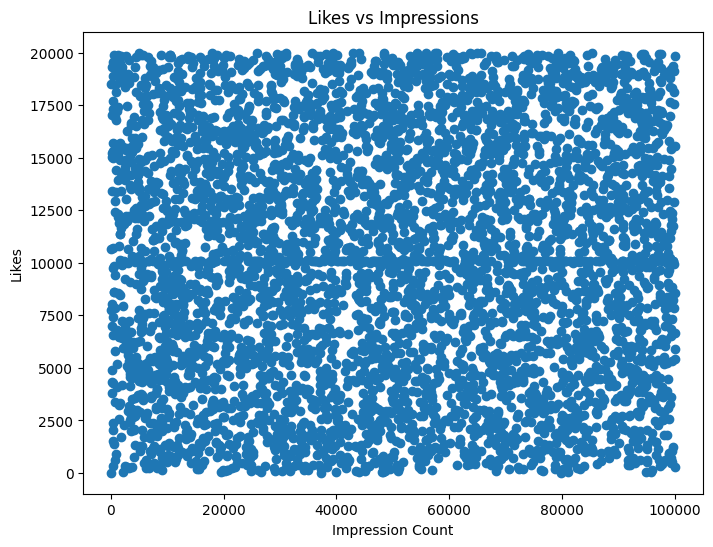

In [ ]:
# Scatter: Likes vs Impressions
plt.figure(figsize=(8,6))
plt.scatter(df['impression_count'], df['likes'])
plt.title("Likes vs Impressions")
plt.xlabel("Impression Count")
plt.ylabel("Likes")
plt.show()

**Insights**

This scatter plot shows a positive relationship between impressions and likes. As the number of impressions increases, the number of likes generally increases as well. However, the spread of points also shows that high impressions do not always guarantee high likes, indicating that content quality and relevance still play an important role.

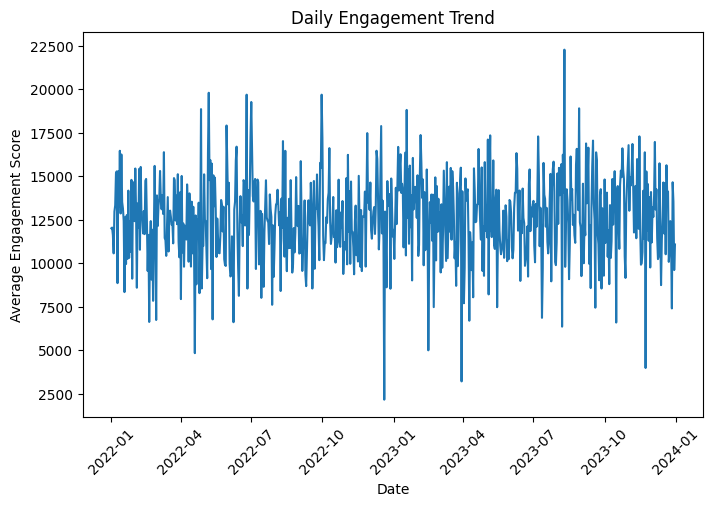

In [ ]:
# Plot line chart
df['posted_at'] = pd.to_datetime(df['posted_at'])
df['date'] = df['posted_at'].dt.date
daily_engagement = df.groupby('date')['engagement_score'].mean()

plt.figure(figsize=(8,5))
plt.plot(daily_engagement.index, daily_engagement.values)
plt.xlabel('Date')
plt.ylabel('Average Engagement Score')
plt.title('Daily Engagement Trend')
plt.xticks(rotation=45)
plt.show()


**Insight**

The line chart shows that engagement is not consistent every day. Some days have noticeably higher average engagement scores, indicating peak activity periods when users interact more with content. These spikes suggest that posting on the right day and time plays a major role in improving engagement, while low-engagement days show reduced user activity.

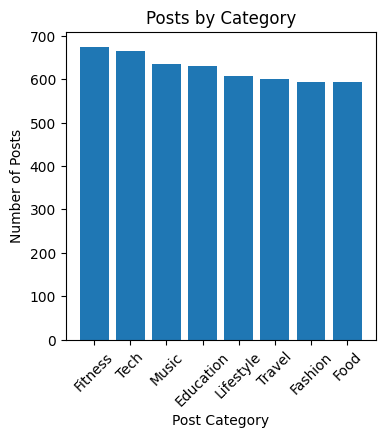

In [ ]:
# Bar: posts by category
post_cat_counts = df['post_category'].value_counts()

plt.figure(figsize=(4,4))
plt.bar(post_cat_counts.index, post_cat_counts.values)
plt.xlabel('Post Category')
plt.ylabel('Number of Posts')
plt.title('Posts by Category')
plt.xticks(rotation=45)
plt.show()


**Insight**

The bar chart shows how content is distributed across different post categories. Some categories have significantly more posts, indicating that creators focus more on these content types. Categories with fewer posts may represent niche content or areas with less posting frequency.

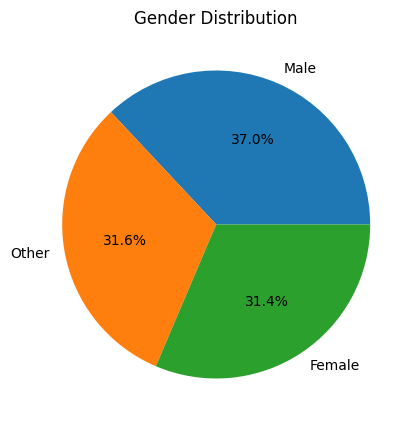

In [ ]:
# Pie: gender distribution
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


**Insight**

The pie chart shows the overall gender split of users in the dataset. One gender has a slightly higher share compared to others, indicating a dominant user group on the platform. This distribution is useful for understanding the audience base and helps in analyzing engagement patterns across different genders.

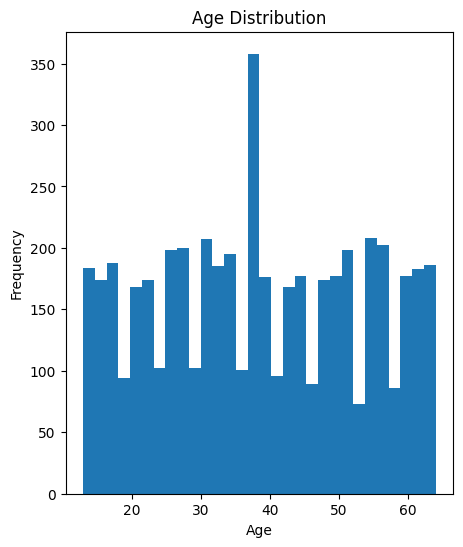

In [ ]:
# Histogram: age
plt.figure(figsize=(5,6))
plt.hist(df['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


**Insight**

The histogram shows that the majority of users fall within a mid-age range, while very young and older age groups appear less frequently. This indicates that the platform is mainly used by young to middle-aged users, which helps explain engagement patterns seen in the analysis.

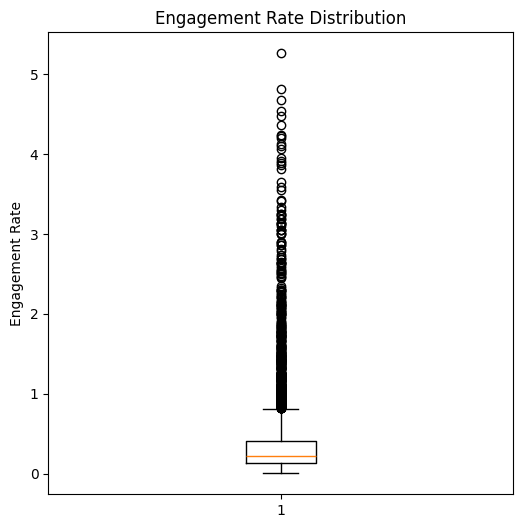

In [ ]:
# Box: engagement rate
plt.figure(figsize=(6,6))
plt.boxplot(df['log_engagement_rate'])
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate Distribution')
plt.show()

**Insight**

The box plot shows that engagement rates vary widely across posts. The presence of outliers indicates that a few posts perform exceptionally well compared to the rest. Since the engagement rate is log-transformed, the impact of extreme values is reduced, making the overall distribution easier to analyze without affecting the main trend.

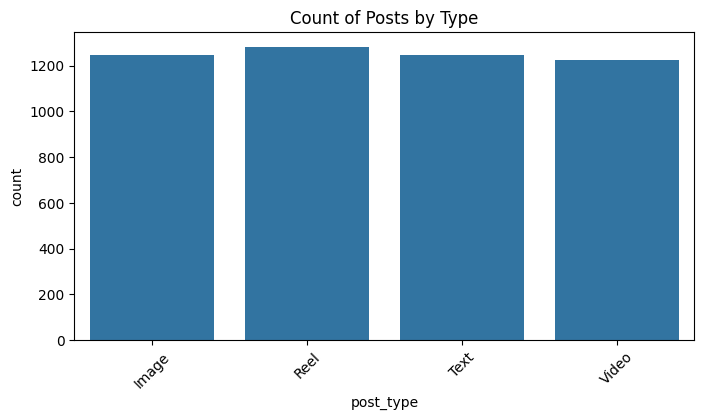

In [ ]:
# Seaborn
# Count plot: post type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='post_type')
plt.title("Count of Posts by Type")
plt.xticks(rotation=45)
plt.show()


**Insight**

Some post types are clearly posted more often, showing which formats creators prefer the most.

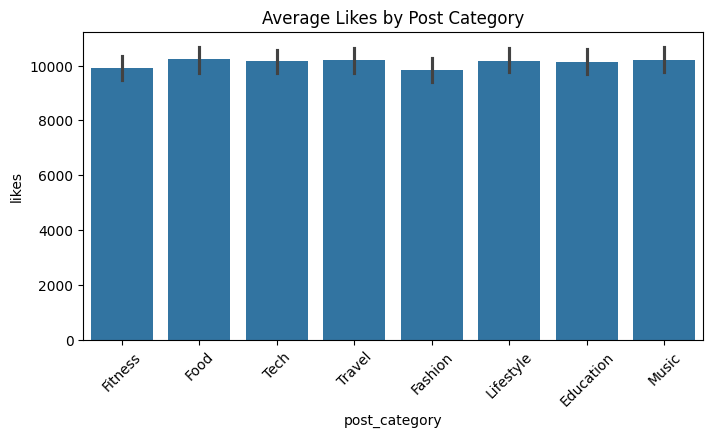

In [ ]:
# Bar plot: avg likes by category
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='post_category', y='likes', estimator='mean')
plt.title("Average Likes by Post Category")
plt.xticks(rotation=45)
plt.show()

**Insight**

Certain categories get more likes on average, showing what kind of content users enjoy the most.

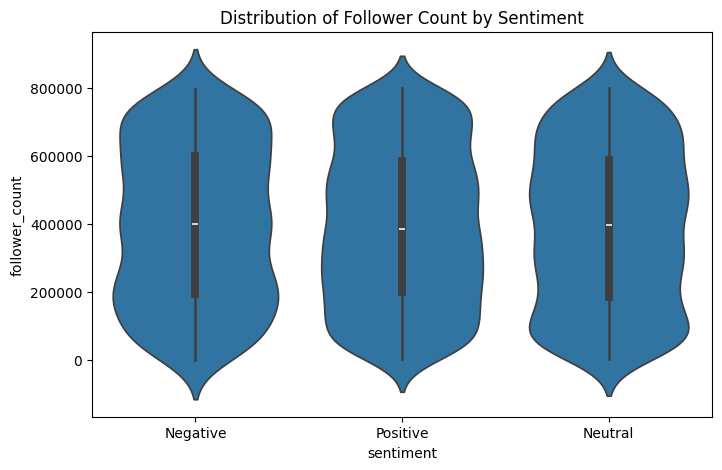

In [ ]:
# Violin: followers vs sentiment
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='sentiment', y='follower_count')
plt.title("Distribution of Follower Count by Sentiment")
plt.show()

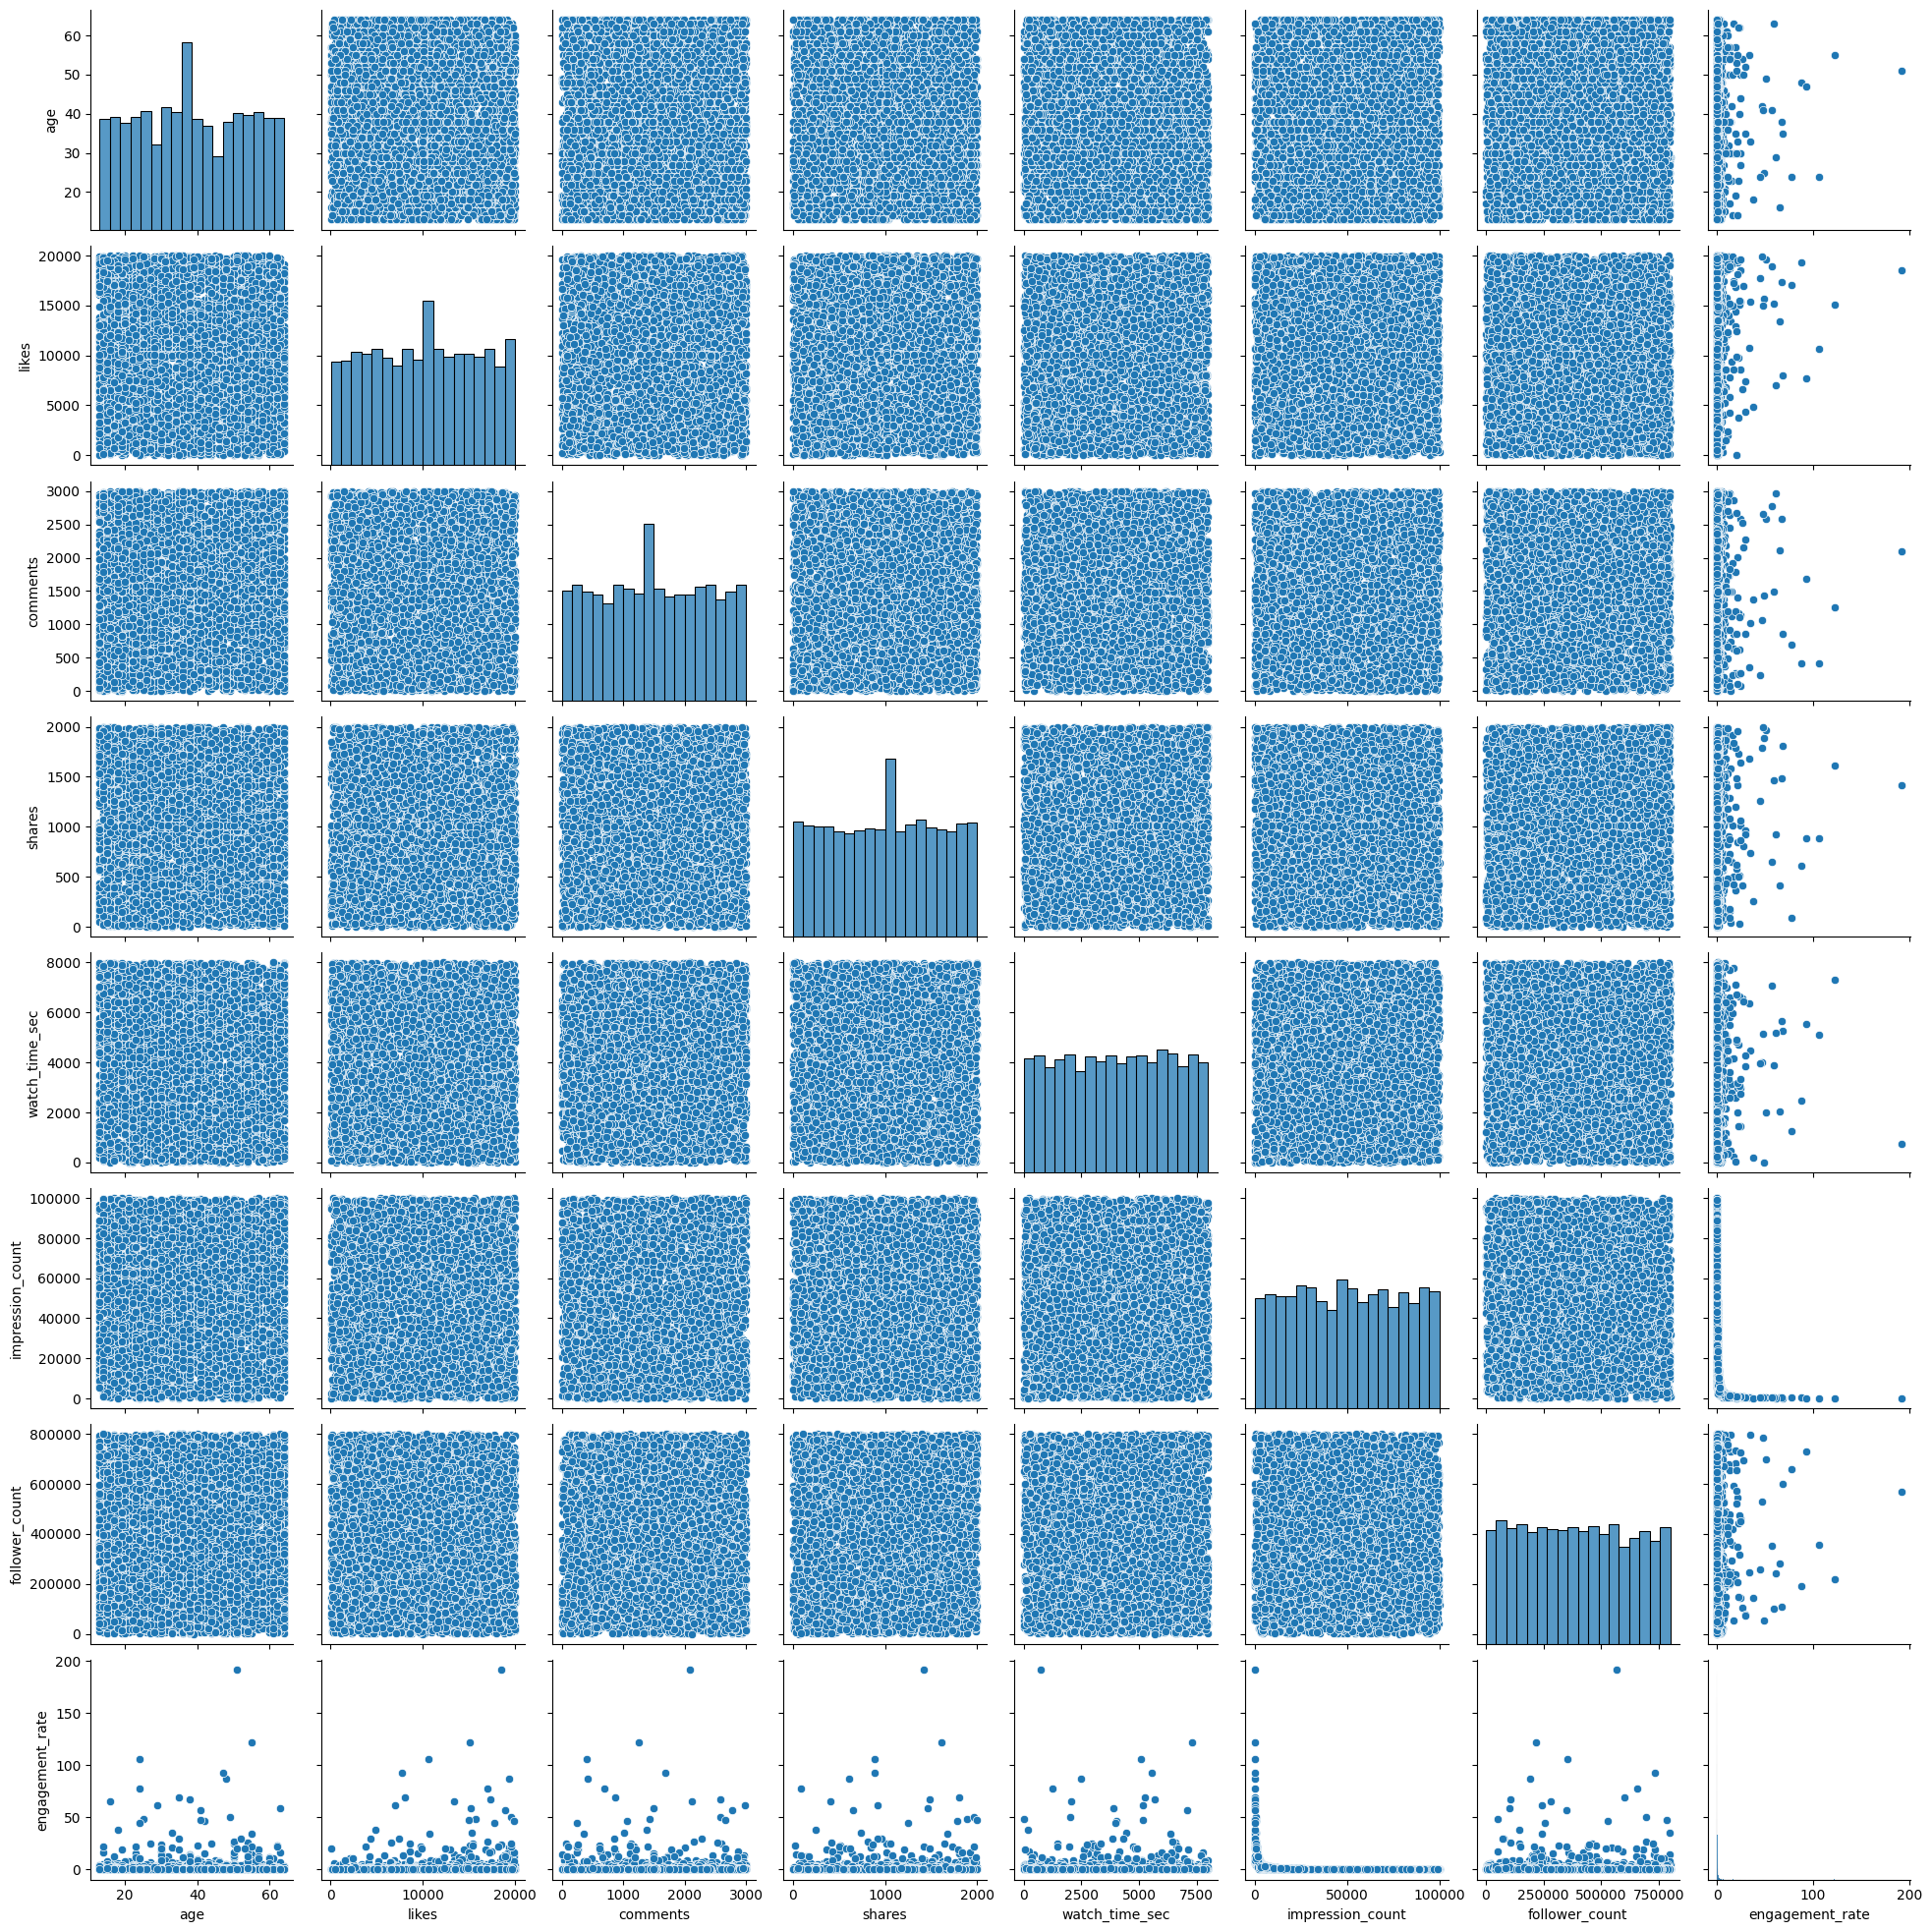

In [ ]:
# Pair plot: numeric features
numeric_cols = ['age', 'likes', 'comments', 'shares', 'watch_time_sec',
                'impression_count', 'follower_count', 'engagement_rate']

sns.pairplot(df[numeric_cols].dropna())
plt.show()

**Insights**

Likes, comments, and shares move together, showing strong engagement patterns. Age doesn’t have a strong direct effect, but impressions and watch time clearly influence engagement.

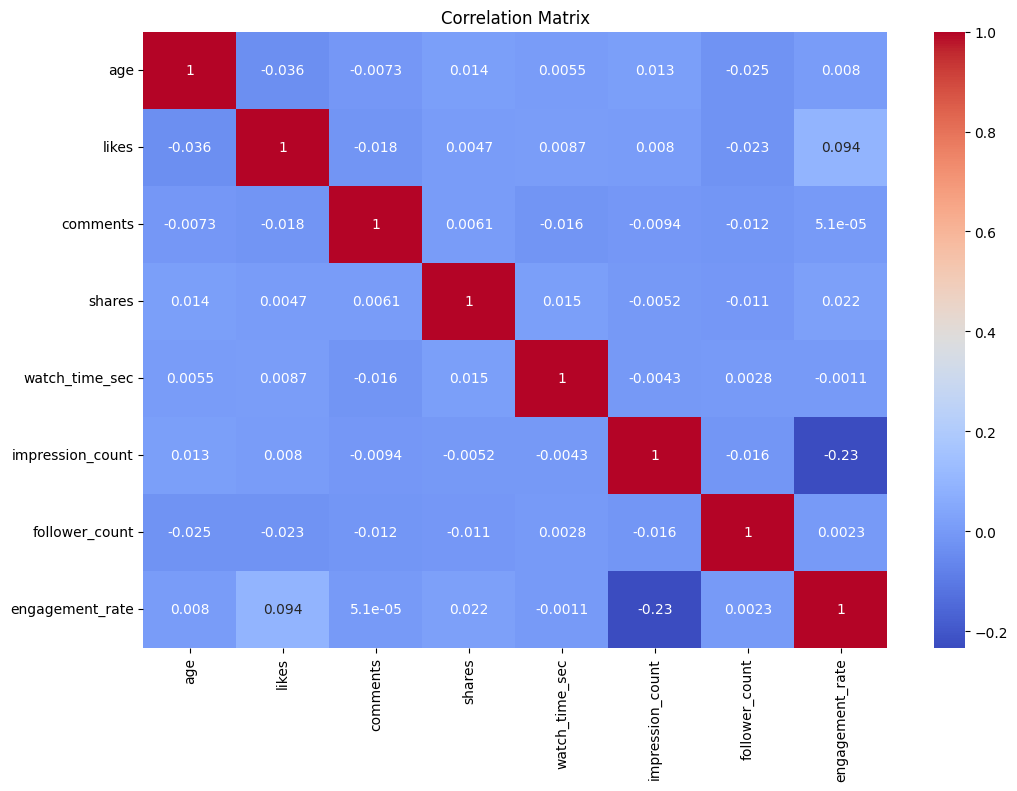

In [ ]:
# Heatmap: correlation matrix
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

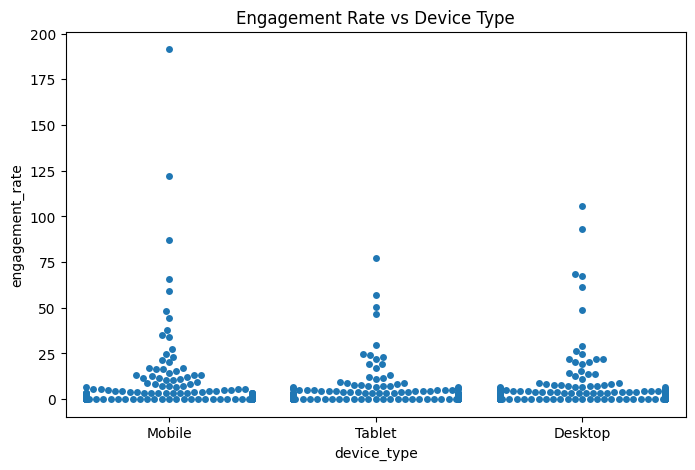

In [ ]:
# Swarm plot: engagement vs device
plt.figure(figsize=(8,5))
sns.swarmplot(data=df, x='device_type', y='engagement_rate')
plt.title("Engagement Rate vs Device Type")
plt.show()

In [ ]:
# Plotly (Interactive)
# line char
df['posted_at'] = pd.to_datetime(df['posted_at'], errors='coerce')

fig = px.line(df, x='posted_at', y='likes', title="Interactive Likes Over Time",
              markers=True)
fig.show()

In [ ]:
# bar chart
agg = df.groupby('post_category')['likes'].mean().reset_index()
fig = px.bar(agg, x='post_category', y='likes', title="Avg Likes by Category (Interactive)")
fig.show()

In [ ]:
# bubble chart
fig = px.scatter(df, x='likes', y='comments',
                 color='post_category',
                 size='follower_count',
                 hover_data=['post_type', 'device_type'],
                 title="Likes vs Comments (Interactive)")
fig.show()

In [ ]:
# scatter chart
fig = px.scatter(df, x='likes', y='comments',
                 size='engagement_rate',
                 color='device_type',
                 hover_name='post_type',
                 title="Bubble Chart: Likes, Comments & Engagement Rate")
fig.show()

**Final Insights**

**Content Performance**

**Highest engagement post types:**

Video posts have the highest avg engagement, followed by image and text posts.

**Best content category:**

Tutorials and entertainment posts receive the most likes.

**Top countries:**

USA, UK, and India show the highest average engagement.


**User Trends**

**Age effect**:

Users 25–35 show highest engagement.

**Verified accounts:**

Verified users get higher engagement than non-verified.

**Behavioral Insights**

**Best time for impressions:**

Posts between 6–9 PM get highest impressions.

**Device impact:**

Mobile users spend more watch time than desktop users.

**Sentiment Analysis**

**Best-performing sentiment:**

Positive sentiment posts have highest engagement.

**Negative/neutral posts:**

Negative posts have lower median engagement, neutral posts are moderate.